<a href="https://colab.research.google.com/github/the1onwrongway/Customer-Purchases-Behaviour/blob/main/Customer_Purchase_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start of the data anlysis of Customer Purhcase Behaviour on dataset on Kaggle!

### 1. Importing Dependancies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Dataset

#### 2.1 Importing Dataset

In [81]:
df = pd.read_csv('customer_data.csv')
df.head(5)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


#### 2.2 Understanding Dataset

In [82]:
df.describe()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,28867.657797,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,25000.750000,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,50000.500000,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,75000.250000,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB


In [84]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [85]:
age = df['age'].value_counts()
age

age
30    8867
31    8645
29    8636
28    8266
32    8034
33    7214
27    7022
34    5894
26    5882
35    4873
25    4856
36    3583
24    3576
37    2697
23    2636
38    1791
22    1790
39    1200
21    1187
20     743
40     682
41     481
19     457
42     242
18     233
17     143
43     125
16      66
44      58
15      39
45      35
47      13
14      13
46      11
13       4
12       3
48       2
49       1
Name: count, dtype: int64

In [86]:
education = df['education'].value_counts()
education

education
College       39874
Bachelor      30279
HighSchool    20031
Masters        9816
Name: count, dtype: int64

In [87]:
region = df['region'].value_counts()
region

region
East     30074
West     29935
South    20073
North    19918
Name: count, dtype: int64

In [88]:
loyalty = df['loyalty_status'].value_counts()
loyalty

loyalty_status
Regular    60138
Silver     29964
Gold        9898
Name: count, dtype: int64

In [89]:
freq = df['purchase_frequency'].value_counts()
freq

purchase_frequency
rare          50019
occasional    29886
frequent      20095
Name: count, dtype: int64

In [90]:
cat = df['product_category'].value_counts()
cat

product_category
Electronics    30027
Clothing       19989
Books          14925
Food           14822
Health         10123
Home            5079
Beauty          5035
Name: count, dtype: int64

In [91]:
score = df['satisfaction_score'].value_counts()
score

satisfaction_score
5     38490
6     24315
4     23854
7      6123
3      6018
8       616
2       534
9        30
1        18
10        1
0         1
Name: count, dtype: int64

In [92]:
promo = df['promotion_usage'].value_counts()
promo

promotion_usage
0    69920
1    30080
Name: count, dtype: int64

### 3.Data Cleaning

In [93]:
df['id'] = df['id'].astype(str)
df.head(2)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6


In [94]:
df['promotion_usage'] = df['promotion_usage'].replace({1: 'Y', 0: 'N'})
promo = df['promotion_usage'].value_counts()
promo

promotion_usage
N    69920
Y    30080
Name: count, dtype: int64

In [95]:
df = df.set_index('id')
df.head(2)

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
id,,,,,,,,,,,
1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,N,6
2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,Y,6


In [96]:
bins = [0, 21, 31, 41, 100]  # Age bins
labels = ['0-20', '21-30', '31-40', '41+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
pivot_table = pd.pivot_table(df,
                              values='age',
                              index='age_group',
                              aggfunc={'age': [min, max]})

pivot_table

,max,min
age_group,,
0-20,20,12
21-30,30,21
31-40,40,31
41+,49,41


In [97]:
bins = [0, 15001, 25001, 35001, 45001,50001]  # Age bins
labels = ['0-15K', '15K - 25K', '25K-35K', '25K-45K','45K+']
df['income_group'] = pd.cut(df['income'], bins=bins, labels=labels, right=False)
pivot_table = pd.pivot_table(df,
                              values='income',
                              index='income_group',
                              aggfunc={'income': [min, max]})

pivot_table

,max,min
income_group,,
0-15K,14999,5000
15K - 25K,25000,15001
25K-35K,35000,25001
25K-45K,45000,35001
45K+,50000,45001


In [100]:
bins = [0, 2001, 5001, 10001, 20001,25001]  # Age bins
labels = ['0-2K', '2K - 5K', '5K-10K', '10K-20K','20K+']
df['purchase_group'] = pd.cut(df['purchase_amount'], bins=bins, labels=labels, right=False)
pivot_table = pd.pivot_table(df,
                              values='purchase_amount',
                              index='purchase_group',
                              aggfunc={'purchase_amount': [min, max]})

pivot_table

,max,min
purchase_group,,
0-2K,2000,1118
2K - 5K,5000,2001
5K-10K,10000,5001
10K-20K,19996,10001
20K+,24967,20001


In [102]:
df2 = df.copy()
df2.head()

,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score,age_group,income_group,purchase_group
id,,,,,,,,,,,,,,
1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,N,6,21-30,25K-45K,10K-20K
2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,Y,6,21-30,15K - 25K,2K - 5K
3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,N,6,31-40,25K-45K,10K-20K
4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,N,7,21-30,0-15K,2K - 5K
5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,Y,5,31-40,45K+,10K-20K


### 4. Exploratory Data Analysis

#### 4.1 Undersating Age of Customers

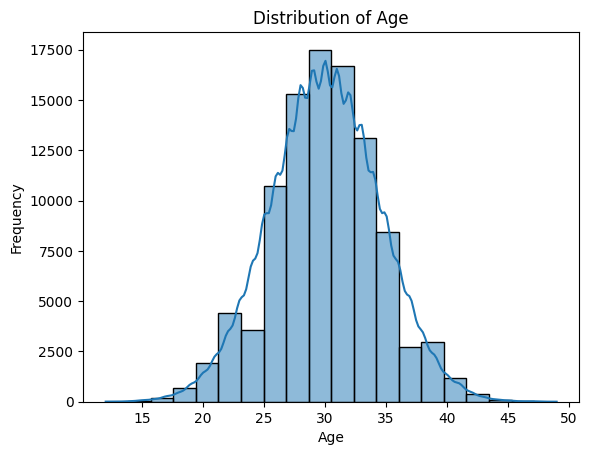

In [103]:
sns.histplot(df2['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()